# 다항회귀와 과적합 이해
***

## 다항회귀
지난 챕터까지 알아본 회귀는 회귀식이 모두 일차식으로 표현됐습니다. 하지만 직선만으로 데이터를 설명하기는 어렵기 때문에 2차 이상의 n차식으로 회귀식이 표현되곤 합니다. 이러한 n차식(n >= 2)을 **다항(polynomial)회귀**라고 합니다. 하지만 다항회귀 역시 **선형회귀**인데요. 만약 데이터가 U자 분포를 띄고 있을 경우 직선 보다는 2차식 형태의 곡선으로 표현하는 것이 적합할 것입니다.

사이킷런에서는 **PolynomialFeatures 클래스**를 통해서 데이터의 변수들을 다항식 형태로 변환해줍니다. 단항식을 2차식으로 변환해보도록 하겠습니다.

In [62]:
from sklearn.preprocessing import PolynomialFeatures
import numpy as np
import pandas as pd
from IPython.display import Image

In [19]:
x = np.asarray([[1,3], [2,4]])

p = PolynomialFeatures(degree = 2) # degree 는 차수를 의미합니다.
p.fit(x)
p_x = p.transform(x)
p_x

array([[ 1.,  1.,  3.,  1.,  3.,  9.],
       [ 1.,  2.,  4.,  4.,  8., 16.]])

[x1, x2]의 형태를 [1, x1, x2, x1^2, x1 * x2, x2^2]형태로 단항식을 2차식으로 변환해줍니다. 임시로 데이터셋을 구축해보고 다항회귀 적용시 어떤 변화가 있는지 살펴보겠습니다. 연령에 따른 소득을 회귀분석을 통해 알아본다고 가정해보겠습니다.

In [35]:
df = pd.DataFrame({'신용' : np.arange(0.5, 6, .5), '연령' : np.arange(5, 60, 5), '소득' : np.arange(50, 600, 50)})

In [36]:
df.head()

,신용,연령,소득
0,0.5,5,50
1,1.0,10,100
2,1.5,15,150
3,2.0,20,200
4,2.5,25,250


In [37]:
p = PolynomialFeatures(degree = 3)
# fit을 한 후 transform을 해도 되지만 fit_transform 메서드로 한 번에 진행할 수 있습니다.
p_age = p.fit_transform(df[['신용', '연령']])
p_age

array([[1.00000e+00, 5.00000e-01, 5.00000e+00, 2.50000e-01, 2.50000e+00,
        2.50000e+01, 1.25000e-01, 1.25000e+00, 1.25000e+01, 1.25000e+02],
       [1.00000e+00, 1.00000e+00, 1.00000e+01, 1.00000e+00, 1.00000e+01,
        1.00000e+02, 1.00000e+00, 1.00000e+01, 1.00000e+02, 1.00000e+03],
       [1.00000e+00, 1.50000e+00, 1.50000e+01, 2.25000e+00, 2.25000e+01,
        2.25000e+02, 3.37500e+00, 3.37500e+01, 3.37500e+02, 3.37500e+03],
       [1.00000e+00, 2.00000e+00, 2.00000e+01, 4.00000e+00, 4.00000e+01,
        4.00000e+02, 8.00000e+00, 8.00000e+01, 8.00000e+02, 8.00000e+03],
       [1.00000e+00, 2.50000e+00, 2.50000e+01, 6.25000e+00, 6.25000e+01,
        6.25000e+02, 1.56250e+01, 1.56250e+02, 1.56250e+03, 1.56250e+04],
       [1.00000e+00, 3.00000e+00, 3.00000e+01, 9.00000e+00, 9.00000e+01,
        9.00000e+02, 2.70000e+01, 2.70000e+02, 2.70000e+03, 2.70000e+04],
       [1.00000e+00, 3.50000e+00, 3.50000e+01, 1.22500e+01, 1.22500e+02,
        1.22500e+03, 4.28750e+01, 4.28750e+02

In [38]:
p_age.shape

(11, 10)

1, x1, x2....x1^3, x2^3까지 2개의 변수가 11개로 늘어난 것을 알 수 있습니다.

실제로 다항회귀를 회귀 문제에 적용하는 일은 드물지만 변수를 탐색하거나 파생변수를 만들때는 유용하다고 할 수 있겠습니다.
***

## 과적합

다항식을 사용할 경우 단순 선형으로 표현이 안되는 회귀식을 표현할 수 있는 장점이 분명 존재합니다.

하지만 이럴 경우 **train데이터에만 학습의 초점**이 맞춰지기 때문에 **test 데이터 예측시 성능이 감소**할 수 있습니다.

실제로 사이킷런의 boston집값 데이터를 활용해 다항회귀를 적용한 후 성능을 비교해보도록 하겠습니다.

In [39]:
from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [49]:
df = load_boston()

X = pd.DataFrame(df.data, columns = df.feature_names) # 예측 data
y = pd.Series(df.target, name = 'target') # 예측 target

In [58]:
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


Polynomial을 적용하지 않고 바로 모델링을 한 후 성능을 평가해보겠습니다.

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state = 105)

In [53]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [54]:
pred = lr.predict(X_test)

rmse = mean_squared_error(y_test, pred)
print(f'{lr.__class__.__name__}의 RMSE는 {np.sqrt(rmse)}')

LinearRegression의 RMSE는 4.4908318901657776


기본 feature로 성능을 평가한 경우 RMSE는 4.5로 나타났습니다. 이제 Polynomial를 적용한 후 진행해보겠습니다.

In [55]:
p = PolynomialFeatures(degree = 3)
p_x = p.fit_transform(X.values)
p_x.shape

총 13개의 feature를 3차 변환을 한 결과 회귀계수는 560개로 대폭 늘어났습니다. 이제 해당 feature들로 모델링을 해보겠습니다.

In [59]:
X_train, X_test, y_train, y_test = train_test_split(p_x, y, test_size = .2, random_state = 105)

In [60]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [61]:
pred = lr.predict(X_test)

rmse = mean_squared_error(y_test, pred)
print(f'{lr.__class__.__name__}의 RMSE는 {np.sqrt(rmse)}')

LinearRegression의 RMSE는 170.20483329072607


기본 feature들만 사용했을 때 보다 RMSE가 훨씬 커진것을 알 수 있습니다. 560개의 회귀계수를 활용해서 매우 복잡한 예측을 한 결과라고 할 수 있습니다. 여기서 우리는 결국 좋은 모델이란 train 데이터의 특징과 test 데이터의 특징 모두 반영한 **균형잡힌(balanced) 모델**이라는 것을 알 수 있습니다.

***
이처럼 머신러닝 모델링에서는 **편향과 분산**을 모두 적정 수준으로 낮추는 작업이 필요합니다. 아래 그림에서 볼 수 있듯이 결국 예측 값이 서로 낮은 분산과 낮은 편향을 가지고 있어야만 최고의 성능을 기록한다고 할 수 있습니다.(출처 : http://scott.fortmann-roe.com/docs/BiasVariance.html)

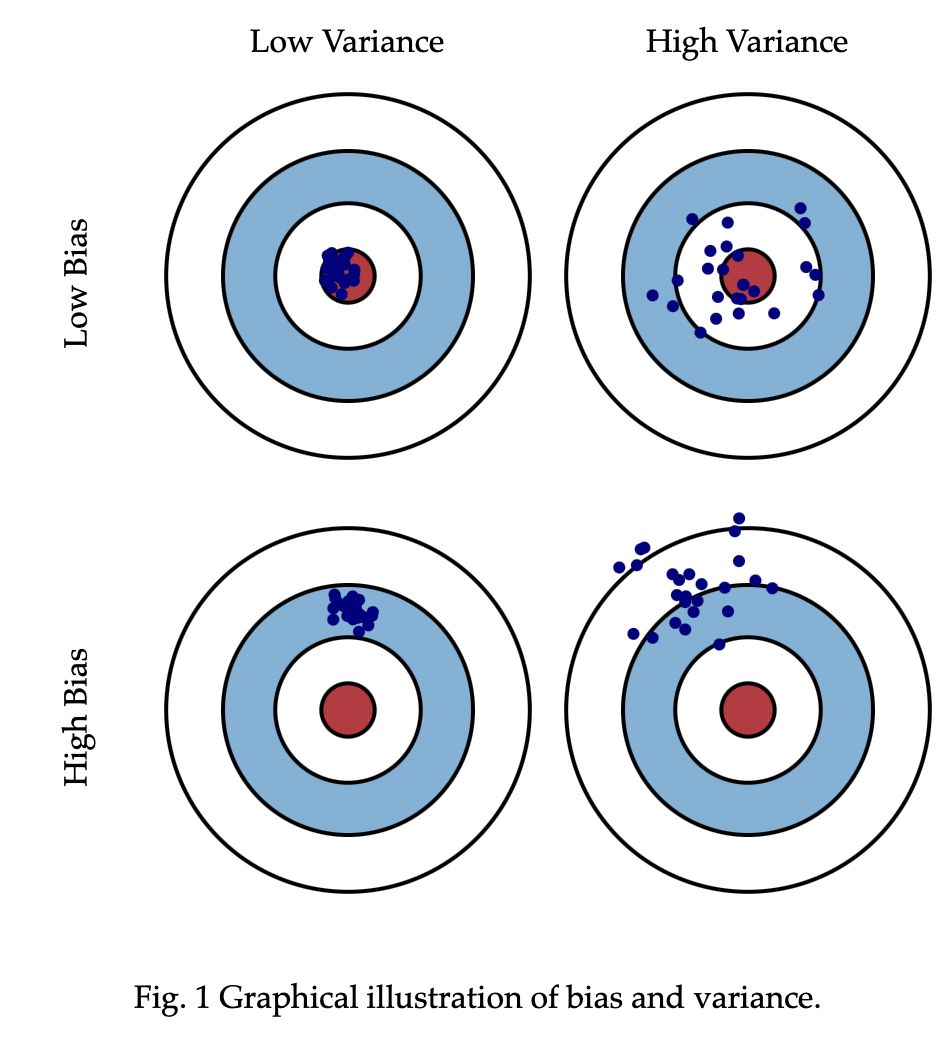

In [66]:
Image('bt.png')

또한 아래 그림 처럼 **Bias와 Variance는 서로 트레이드 오프 관계**이기 때문에 편향을 적정수준으로 낮추고 분산은 편향보다 약간 높은 수준인 **'골디락스'** 지점을 통과하면 다시 모델의 성능이 저하됩니다.

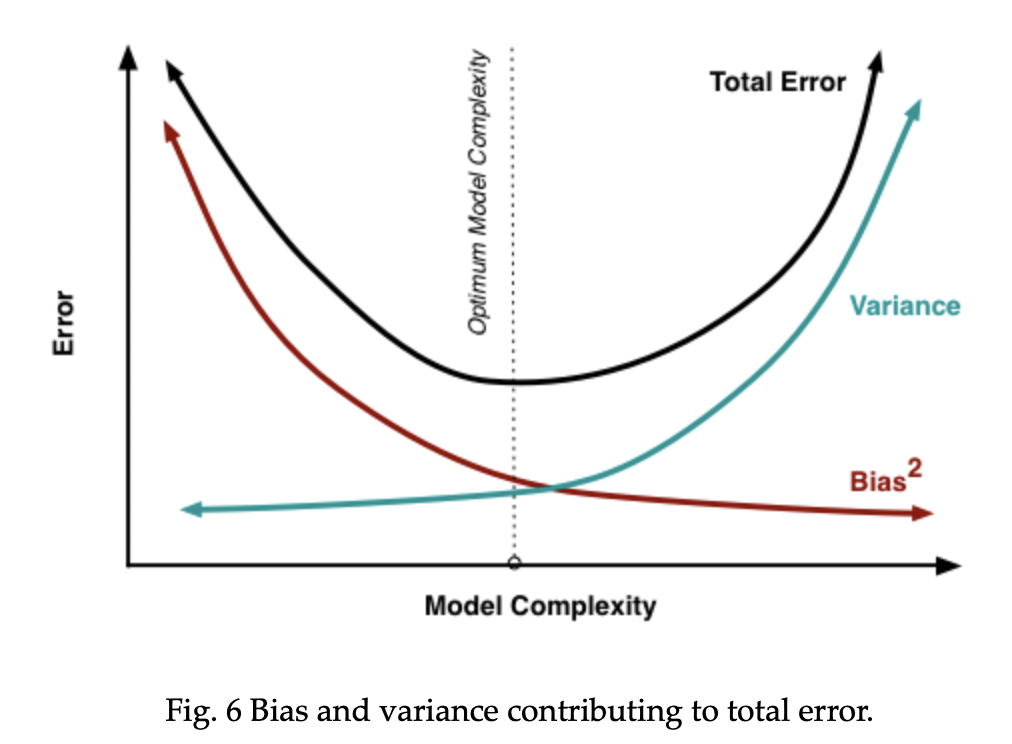

In [67]:
Image('mc.png')

**높은 편향과 낮은 분산에서는 과소적합이, 낮은 편향과 높은 분산에서는 과대적합이 발생**하게 됩니다. 결국 모든 ML문제는 편향과 분산사이의 트레이드오프를 잘 유지하고 전체 오류를 낮추는 것만이 최적의 모델로 해결될 것입니다.
***

지금까지 다항회귀와 과적합에 대해 알아보았는데요. 다음 챕터에서는 회귀 모델 알고리즘 중에서 **규제 선형 모델**인 **릿지**, **라쏘**, **엘라스틱넷**에 대해서 알아보도록 하겠습니다. 감사합니다.